### Simple Linear Regression:

In Simple Linear Regression, we have two variables:

-- Independent Variable/ Predictor / Input Variable (X):

This variable is used to predict the value of the dependent variable.

-- Dependent Variable/ Response / Output variable (Y):

This is the variable we want to predict.

The relationship between X and Y is modeled as a straight line:

Y=mX+b

where:

- Y is the dependent variable (what we want to predict),
- X is the independent variable,
- m is the slope of the line (how much
- Y changes with each unit change in (X),
- b is the y-intercept (the value of Y when X is 0).


Creating Dataset

Creating a Dataset with One Input and One Target Column using sklearn's make_regression class for applying Simple Linear Regression Class.

In [7]:
import numpy
from sklearn.datasets import make_regression

In [8]:
input_,target_ = make_regression(n_samples=500, n_features=1, n_informative=3, n_targets=1, noise=20)

Plotting the dataset

In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'target')

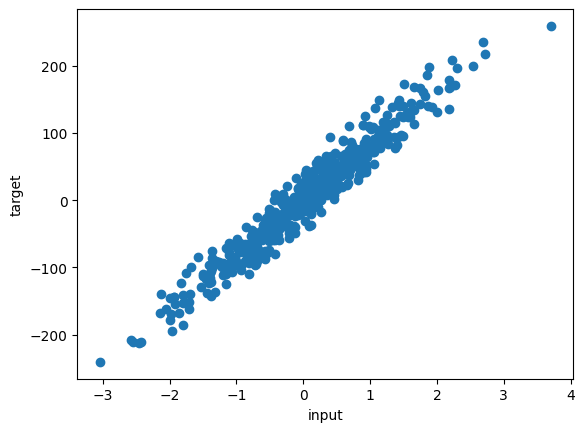

In [11]:
plt.scatter(input_,target_)
plt.xlabel('input')
plt.ylabel('target')

Splitting data into train and test datasets

In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(input_, target_, test_size = 0.2 , random_state = 42)

In [13]:
train_input.shape

(400, 1)

In [14]:
test_input.shape

(100, 1)

In [15]:
train_target.shape

(400,)

Building Simple Linear Regression Class.

In [16]:
class SimpleLinearRegression:
    
    # Creating an initializor
    def __init__(self):
        self.m = None
        self.b = None

   # Creating 'fit' Function
    def fit(self, train_input, test_input):
        
        # Calculating slope of the line (m):
        numerator = 0
        denominator = 0
        
        for i in range(train_input.shape[0]):
            
            numerator = numerator + ((train_input[i] - train_input.mean()) * (train_target[i] - train_target.mean()))
            denominator = denominator + ((train_input[i] - train_input.mean()) * (train_input[i] - train_input.mean()))
            
        self.m = numerator/denominator
        
        # Calculating coefficent of the line(b):
        self.b = train_target.mean() - (self.m * train_input.mean())
        
    @property
    def coefficients(self):
        if self.m is not None:
            return self.m
        else:
            print("Model not fitted yet.")
            return None

    @property
    def intercept(self):
        if self.b is not None:
            return self.b
        else:
            print("Model not fitted yet.")
            return None
        
        
    # Creating 'predict' Function
    def predict(self, test_input):
        return self.m * test_input + self.b

In [17]:
train_input.shape[0]

400

In [26]:
slr = SimpleLinearRegression()

In [27]:
slr.fit(train_input, train_target)

In [28]:
slr_pred = slr.predict(test_input)

In [29]:
slr.coefficients

array([82.25818284])

In [30]:
slr.intercept

array([-0.17854369])

Validation Results: Using sklearn's LinearRegression class

In [31]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(train_input, train_target)

LinearRegression()

In [39]:
lr.coef_

array([82.25818284])

In [40]:
lr.intercept_

-0.178543686004915

sklearn LinearRegression is giving exactly same as our made SimpleLinearRregression Class

Plotting the Regression Line

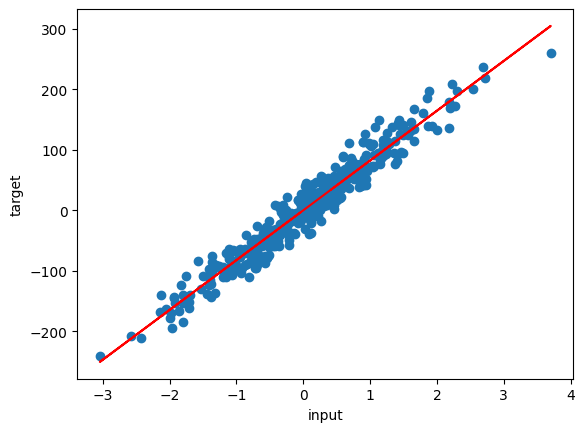

In [41]:
plt.scatter(train_input, train_target)
plt.plot(train_input,lr.predict(train_input),color='red')
plt.xlabel('input')
plt.ylabel('target')
plt.show()

In [42]:
lr_pred = lr.predict(test_input)

Checking Regression Metrics


### Checking Regression Metrics

Regression metrics are used to evaluate the performance of regression models, which predict continuous numerical values. Scikit-analyze provides several metrics, each with its own strengths and boundaries, to assess how well a model suits the statistics.

Note: We will compare our model result with sklearn's metrics.
### Types of Regression Metrics

Some common regression metrics in scikit-learn with examples

- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R²) Score
- Adjusted R-squared (R²) Score



In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


### Mean Absolute Error (MAE):

It is the average of the absolute differences between the predicted and actual values.

Formula: image.png

Where:

- xi represents the actual or observed values for the i-th data point.
- yi represents the predicted value for the i-th data point.



In [44]:
print("LR MAE",mean_absolute_error(test_target,lr_pred))
print("SLR MAE",mean_absolute_error(test_target,slr_pred))

LR MAE 16.07252371407519
SLR MAE 16.072523714075185



### Mean Squared Error (MSE):

It is the average of the squared differences between the predicted and actual values.

Formula: image.png

Where:

- xi represents the actual or observed value for the i-th data point.
- yi represents the predicted value for the i-th data point.



In [45]:
print("LR MSE",mean_squared_error(test_target,lr_pred))
print("SLR MSE",mean_squared_error(test_target,slr_pred))

LR MSE 430.7300544531914
SLR MSE 430.73005445319126



### Root Mean Squared Error (RMSE):

It is the square root of the MSE and provides the error in the same units as the target variable.

Formula: image.png

Where:

- xi represents the actual or observed value for the i-th data point.
- yi represents the predicted value for the i-th data point.



In [46]:
import numpy as np

In [47]:
print("LR RMSE",np.sqrt(mean_squared_error(test_target,lr_pred)))
print("SLR RMSE",np.sqrt(mean_squared_error(test_target,slr_pred)))

LR RMSE 20.754037063983272
SLR RMSE 20.75403706398327



#### R-squared (R2):

It measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

Formula: image.png

Where:

- R2 is the R-Squared.
- SSR represents the sum of squared residuals between the predicted values and actual values.
- SST represents the total sum of squares, which measures the total variance in the dependent variable.

Ranges from 0 to 1, where 1 indicates a perfect fit.


In [48]:
print("LR R2",r2_score(test_target,lr_pred))

print("SLR R2",r2_score(test_target,slr_pred))

LR R2 0.928111323663907
SLR R2 0.928111323663907


In [50]:
lr_r2 = r2_score(test_target,lr_pred)
slr_r2 = r2_score(test_target,slr_pred)


### Adjusted R2 score

Similar to R-squared but penalizes for adding irrelevant features to the model.

Adjusts the R-squared value based on the number of predictors.

-- Useful in multiple linear regression.


In [51]:
print("LR Adjusted R2 score", 1 - ((1-lr_r2)*(100-1)/(100-1-1)))
print("SLR Adjusted R2 score", 1 - ((1-slr_r2)*(100-1)/(100-1-1)))

LR Adjusted R2 score 0.9273777657421102
SLR Adjusted R2 score 0.9273777657421102


These metrics help in assessing how well a regression model performs in terms of accuracy and precision in predicting continuous outcomes.
